In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df_birth = pd.read_excel('data_birth_combined.xlsx')
df_birth.head()

,state,2019,2015,2005,1998,1992
0,andhrapradesh,1050,1206,885,950,1410
1,arunachalpradesh,2345,2377,562,400,551
2,assam,4298,4388,819,1026,1611
3,bihar,11482,13842,1513,3510,3403
4,delhi,1142,579,606,698,1323


In [39]:
df_death = pd.read_excel('data_death_combined.xlsx')
df_death.head()

,state,2019,2015,2005,1998,1992
0,andhrapradesh,663,735,547,671,664
1,arunachalpradesh,236,330,155,87,92
2,assam,1414,1876,417,353,638
3,bihar,4033,4486,547,1192,1069
4,delhi,350,211,242,223,389


In [40]:
year = np.array(pd.to_numeric(df_birth.columns[1:])).reshape(-1,1)
birth_values = df_birth.values[:,1:].astype(int)
death_values = df_death.values[:,1:].astype(int)
neonatal_mortality = death_values/birth_values*1000

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()

poly = PolynomialFeatures(2)
PLR = LinearRegression()

In [42]:
year_trans = poly.fit_transform(year)

In [43]:
# predict the neonatal_mortality in 2030
lr_predict_1 = []
plr_predict_1 =[]
for n in neonatal_mortality:
    reg = LR.fit(year,n)
    poly_reg = PLR.fit(year_trans,n)

    lr_predict_1.append(reg.predict([[2030]])[0])
    plr_predict_1.append(poly_reg.predict(poly.fit_transform([[2030]]))[0])

In [44]:
states = np.array(df_birth["state"])
states

array(['andhrapradesh', 'arunachalpradesh', 'assam', 'bihar', 'delhi',
       'goa', 'gujarat', 'haryana', 'himachalpradesh', 'karnataka',
       'kerala', 'maharashtra', 'manipur', 'meghalaya', 'mizoram',
       'nagaland', 'punjab', 'rajasthan', 'tripura', 'uttarpradesh',
       'westbengal'], dtype=object)

In [45]:
neonatal_mortality[0:4]

array([[631.42857143, 609.45273632, 618.07909605, 706.31578947,
        470.92198582],
       [100.63965885, 138.83045856, 275.80071174, 217.5       ,
        166.96914701],
       [328.99022801, 427.52962625, 509.15750916, 344.0545809 ,
        396.02731223],
       [351.24542763, 324.08611472, 361.5333774 , 339.6011396 ,
        314.13458713]])

In [46]:
df_final_1 = pd.DataFrame(neonatal_mortality,columns=df_birth.columns[1:])
df_final_1.insert(0,"state",states)
df_final_1.insert(6,"2030(lr)",lr_predict_1)
df_final_1.insert(7,"2030(plr)",plr_predict_1)
df_final_1

,state,2019,2015,2005,1998,1992,2030(lr),2030(plr)
0,andhrapradesh,631.428571,609.452736,618.079096,706.315789,470.921986,675.432302,379.485072
1,arunachalpradesh,100.639659,138.830459,275.800712,217.500000,166.969147,103.404784,-231.748214
2,assam,328.990228,427.529626,509.157509,344.054581,396.027312,387.877617,105.713733
3,bihar,351.245428,324.086115,361.533377,339.601140,314.134587,354.458399,290.363781
4,delhi,306.479860,364.421416,399.339934,319.484241,294.028723,361.820944,131.004104
5,goa,97.744361,179.856115,255.434783,512.315271,443.561208,-51.698711,-135.998575
6,gujarat,368.817711,397.063230,555.555556,474.369406,383.333333,392.565832,-39.755643
7,haryana,391.675196,242.135642,299.248120,340.681363,323.446328,321.213389,476.108276
8,himachalpradesh,406.219631,438.829787,344.827586,262.678804,329.724409,476.052727,571.039251
9,karnataka,332.726169,309.658148,488.612836,536.870504,473.187979,244.975534,22.036085


In [47]:
# poly1 = PolynomialFeatures(2)
# n = neonatal_mortality[0]
# year = year.flatten()
# reg = LR.fit(n.reshape(-1,1),year)
# poly_reg = PLR.fit(poly1.fit_transform(n.reshape(-1,1)),year)

# x = np.linspace(100,900,2000).reshape(-1,1)
# y_lr = reg.predict(x)
# y_plr = poly_reg.predict(poly1.fit_transform(x))

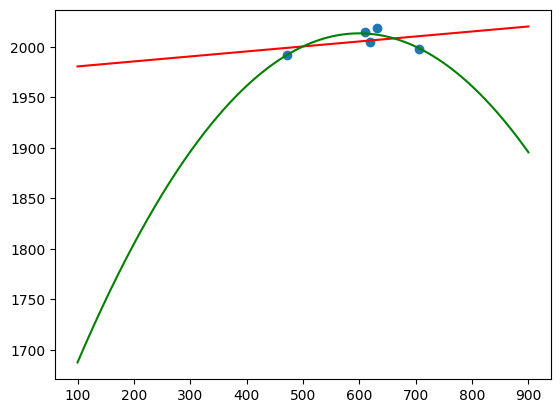

In [48]:
# plt.scatter(n,year)
# plt.plot(x,y_lr,color='red')
# plt.plot(x,y_plr,color='green')
# plt.show()

In [49]:
# n = neonatal_mortality[1]
# year = year.flatten()
# reg = LR.fit(n.reshape(-1,1),year)
# poly_reg = PLR.fit(poly.fit_transform(n.reshape(-1,1)),year)

# x = np.linspace(100,900,2000).reshape(-1,1)
# y_lr = reg.predict(x)
# y_plr = poly_reg.predict(poly.fit_transform(x))

In [50]:
# plt.scatter(n,year)
# plt.plot(x,y_lr,color='red')
# plt.plot(x,y_plr,color='green')
# plt.show()

In [51]:
# predict the year in which neonatal_mortality will reach 12
lr_predict_2 = []
plr_predict_2 =[]
year = year.flatten()
for n in neonatal_mortality:
    reg = LR.fit(n.reshape(-1,1),year)
    poly_reg = PLR.fit(poly.fit_transform(n.reshape(-1,1)),year)

    lr_predict_2.append(reg.predict([[12]])[0])
    plr_predict_2.append(poly_reg.predict(poly.fit_transform([[12]]))[0])

In [52]:
df_final_2 = pd.DataFrame(neonatal_mortality,columns=df_birth.columns[1:])
df_final_2.insert(0,"state",states)
df_final_2.insert(6,"NMR-12(lr)",lr_predict_2)
df_final_2.insert(7,"NMR-12(plr)",plr_predict_2)
df_final_2

,state,2019,2015,2005,1998,1992,NMR-12(lr),NMR-12(plr)
0,andhrapradesh,631.428571,609.452736,618.079096,706.315789,470.921986,1976.363831,1562.431732
1,arunachalpradesh,100.639659,138.830459,275.800712,217.500000,166.969147,2020.274035,2078.993345
2,assam,328.990228,427.529626,509.157509,344.054581,396.027312,2011.028304,2138.142153
3,bihar,351.245428,324.086115,361.533377,339.601140,314.134587,1930.567576,261.465889
4,delhi,306.479860,364.421416,399.339934,319.484241,294.028723,1983.547812,1506.575091
5,goa,97.744361,179.856115,255.434783,512.315271,443.561208,2022.940417,2033.097169
6,gujarat,368.817711,397.063230,555.555556,474.369406,383.333333,2021.552373,2248.198923
7,haryana,391.675196,242.135642,299.248120,340.681363,323.446328,2004.845043,2326.331852
8,himachalpradesh,406.219631,438.829787,344.827586,262.678804,329.724409,1959.806872,2034.879604
9,karnataka,332.726169,309.658148,488.612836,536.870504,473.187979,2045.399980,2113.056540
